In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def f(t, y, m, g, L, b):
    f0 = y[1]
    f1 = -(b/m) * y[1] - m * g / (L * (m-2*b)) * np.sin(y[0])
    return np.array([f0,f1])

def Jf(t, y, m, g, L, b):
    return np.array([[0, 1],[-m*g/(L * (m-2*b)) * np.cos(y[0]), -b/m]])

In [3]:
#RK4
def rk45(t, y, h, f, m, g, L, b):
    k1 = f(t,     y,        m, g, L, b)
    k2 = f(t+h/2, y+h/2*k1, m, g, L, b)
    k3 = f(t+h/2, y+h/2*k2, m, g, L, b)
    k4 = f(t+h,   y+h*k3,   m, g, L, b)
    return y + h/6*(k1+2*k2+2*k3+k4)

In [13]:
m = 1.0
g = 9.8
L = 2.0
b = 0.2

T = 25
nsteps = 20
h = T/nsteps
y = np.zeros((2,nsteps))
y[:,0] = [np.pi/4, 0]

print(h, 2/np.abs(np.linalg.eig(Jf(0, y[:,0], m,g,L,b))[0]))

for k in range(1,nsteps):
    t = (k-1)*h # unused for this f()
    y[:,k] = rk45(t, y[:,k-1], h, f, m, g, L, b)
    #print(2/np.abs(np.linalg.eig(Jf(0, y[:,k], m,g,L,b))[0]))

1.25 [0.83227161 0.83227161]


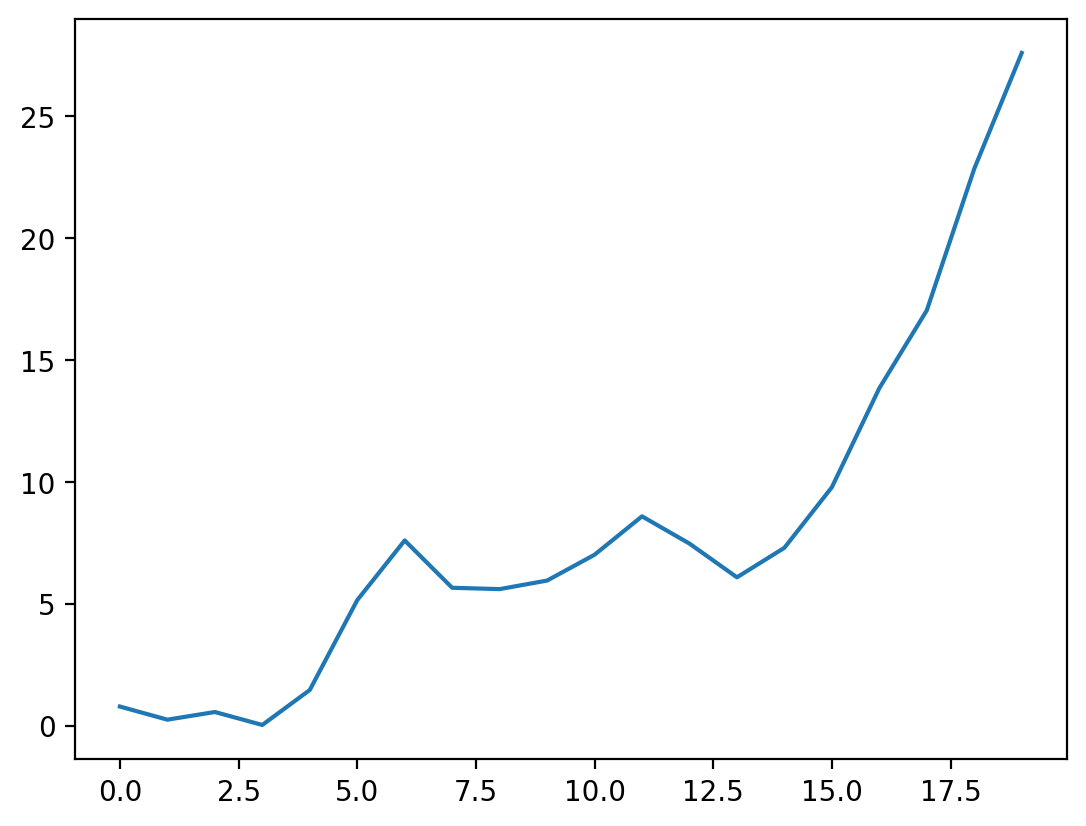

In [14]:
plt.plot(y[0,:])

In [18]:
s = solve_ivp(f, t_span=[0.0, 25],
              method='RK45',
              y0=[np.pi/4, 0.0],
              args=(m,g,L,b))

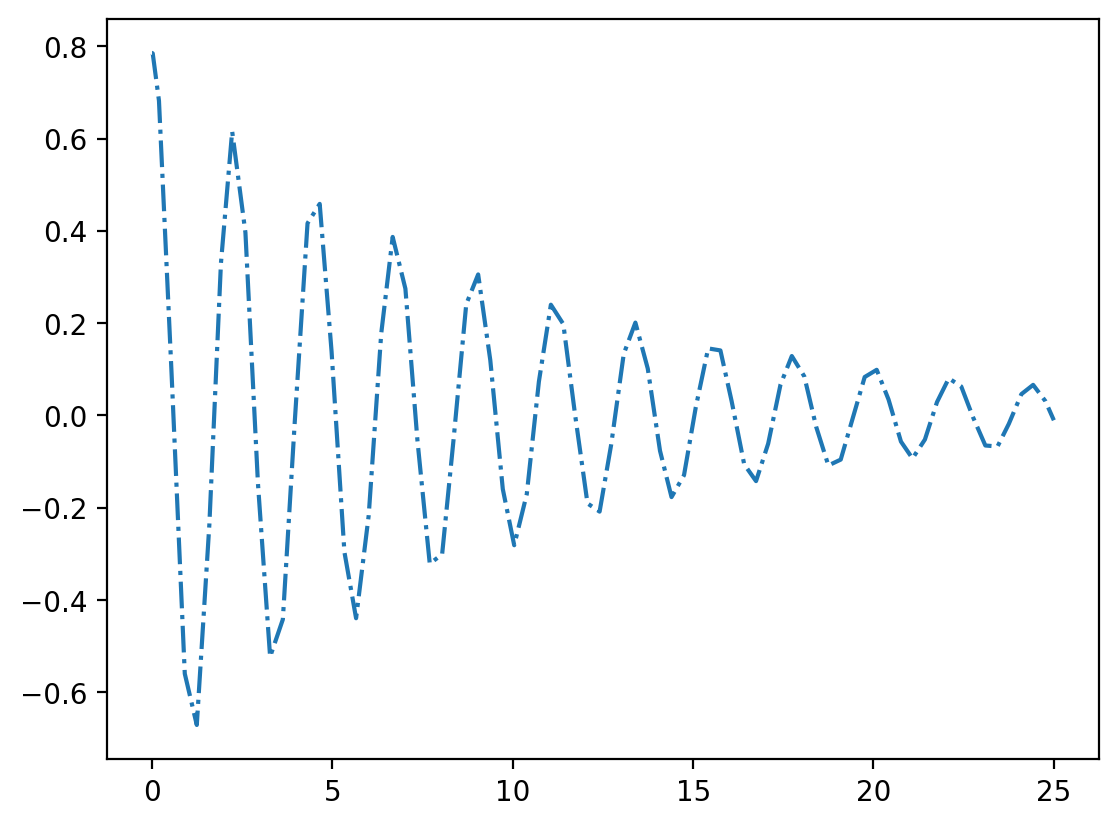

In [19]:
plt.plot(s.t, s.y[0], '-.',ms=2)

In [20]:
np.diff(s.t)

array([1.72948802e-04, 1.72948802e-03, 1.72948802e-02, 1.72948802e-01,
       3.45851447e-01, 3.69717147e-01, 3.32975308e-01, 3.48135206e-01,
       3.21266173e-01, 3.11157508e-01, 3.67548795e-01, 3.47535934e-01,
       3.36919319e-01, 3.52977888e-01, 3.30626557e-01, 3.53674429e-01,
       3.37343821e-01, 3.28689418e-01, 3.56111148e-01, 3.23656606e-01,
       3.50279447e-01, 3.46860224e-01, 3.17525431e-01, 3.52754340e-01,
       3.33337156e-01, 3.41934670e-01, 3.42986831e-01, 3.17113446e-01,
       3.51261507e-01, 3.30303811e-01, 3.36171061e-01, 3.46833855e-01,
       3.16431790e-01, 3.48534753e-01, 3.35976283e-01, 3.31776044e-01,
       3.45419236e-01, 3.22671670e-01, 3.47040174e-01, 3.35862994e-01,
       3.21306491e-01, 3.47690245e-01, 3.23087873e-01, 3.42985940e-01,
       3.39310599e-01, 3.19154744e-01, 3.46465358e-01, 3.27181856e-01,
       3.42208047e-01, 3.39711734e-01, 3.11580381e-01, 3.47951173e-01,
       3.27993164e-01, 3.36723943e-01, 3.41887396e-01, 3.13049856e-01,
      

In [ ]:
h